# <span style='color:blue'> LAB2: </span>
# <span style='color:blue'> PYTORCH INTRODUCTION </span>

# <span style='color:red'> Part 1: Python as Deep Learning Platform -----------------------------------------------------</span>

### 1.1 - Verify PyTorch Installation

In [1]:
# Import necessary packages

import numpy as np
import torch

In [2]:
# Define a random torch tensor of shape (5, 3)

x = torch.rand(5, 3)
print(x)

tensor([[0.8829, 0.2166, 0.3716],
        [0.4344, 0.8952, 0.3731],
        [0.1269, 0.2314, 0.1175],
        [0.7511, 0.9716, 0.6993],
        [0.0049, 0.2141, 0.4493]])


In [3]:
# This lines ensures PyTorch can communicate with your GPU for hardware acceleration

torch.cuda.is_available()

True

# <span style='color:red'> Part 2: Neural Network Workflow in PyTorch (Simple Linear Regression) ----------</span>

### 2.1 - Prepare Data

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

In [5]:
# Generate training data for x and y

x_train = np.arange(11, dtype = np.float32)
x_train = x_train[:, np.newaxis] # [:, np.nexaxis] re-orient the x_train so that it's in vertical orientation

y_train = (2 * x_train) + 1

In [6]:
print(x_train)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [7]:
print(y_train)

[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]]


### 2.2 - Define Model

In [8]:
# A neural network model in PyTorch is a class 

class linearRegression(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim): # Initializes the model with a linear layer with input/output dimension
        
        super(linearRegression, self).__init__() # This line allows us to use attributes/methods from torch.nn.Module
        
        self.linear = torch.nn.Linear(input_dim, output_dim) # Define a single linear layer with input/output dimensions

    def forward(self, x): # This function describes the information flow within the network from input -> output
        
        out = self.linear(x) # We only have a single layer so the network output = output of the linear layer 
        
        return out

### 2.3 - Select Hyperparameters

In [9]:
# Initialize our neural network model with input and output dimensions
model = linearRegression(input_dim = 1, output_dim = 1)

# Define the learning rate and epoch (# of iterations)
learning_rate = 0.01 
epochs = 100

# Define loss function and optimizer
loss_func = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Run this line if you have PyTorch GPU version
if torch.cuda.is_available():
    model.cuda()

### 2.4 - Identify Tracked Values

In [10]:
# Define a list or numpy array placeholder to keep track of our training loss

train_loss_list = []

### 2.5 - Train Model

In [11]:
# Convert our dataset (inputs and targets) into torch tensors

if torch.cuda.is_available():
    inputs = torch.from_numpy(x_train).cuda() # If using GPU version, transfer the dataset to GPU memory
    targets = torch.from_numpy(y_train).cuda()
else:
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

# TRAINING LOOP-------------------------------------------------------------------------

for epoch in range(epochs): # For each epoch (i.e. single pass on the training dataset)

    optimizer.zero_grad() # Empty the gradient buffer so each learning event per epoch is separate

    outputs = model(inputs) # Forward pass the inputs through the network to produce outputs 

    loss = loss_func(outputs, targets) # Compute the loss via comparing the output with expected targets
    
    train_loss_list.append(loss.item()) # Save the loss value to train_loss_list we defined
    
    loss.backward() # Compute how much changes to be made to weights/biases

    optimizer.step() # Update the weights/biases according to learning rate

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 132.63328552246094
epoch 1, loss 10.824455261230469
epoch 2, loss 0.8888248205184937
epoch 3, loss 0.07834146171808243
epoch 4, loss 0.01216757483780384
epoch 5, loss 0.006705501116812229
epoch 6, loss 0.006196201778948307
epoch 7, loss 0.006091557443141937
epoch 8, loss 0.006020654458552599
epoch 9, loss 0.005953175947070122
epoch 10, loss 0.0058866702020168304
epoch 11, loss 0.005820936057716608
epoch 12, loss 0.005755933932960033
epoch 13, loss 0.005691672675311565
epoch 14, loss 0.0056281001307070255
epoch 15, loss 0.005565257277339697
epoch 16, loss 0.005503113381564617
epoch 17, loss 0.00544164702296257
epoch 18, loss 0.0053808786906301975
epoch 19, loss 0.005320800933986902
epoch 20, loss 0.0052614035084843636
epoch 21, loss 0.005202637519687414
epoch 22, loss 0.005144563969224691
epoch 23, loss 0.0050871106795966625
epoch 24, loss 0.005030293017625809
epoch 25, loss 0.004974109120666981
epoch 26, loss 0.004918575286865234
epoch 27, loss 0.004863646347075701
epoch 

### 2.6 - Visualization and Evaluation

In [15]:
with torch.no_grad(): # Telling PyTorch we aren't passing inputs to the model for training purpose, which requires gradient
    
    if torch.cuda.is_available(): # If you are using GPU version
        
        # 1. Convert x_train (np.array) -> torch tensors with torch.from_numpy()
        # 2. Transfer x_train to GPU using .cuda()
        # 3. Feed forward x_train to model to obtain the output using model()
        # 4. Since the model lives in GPU, we should bring back the model output to CPU with .cpu()
        # 5. Finally convert the torch tensor to numpy with .numpy()
        predicted = model(torch.from_numpy(x_train).cuda()).cpu().numpy() 
        
    else:
        
        # With CPU version, steps 2,3,4 above is not needed
        predicted = model(torch.from_numpy(x_train)).numpy()
    
    # Print the predicted outputs - i.e., y-values and weight and biases in the trained neural network
    print(predicted) 
    print("a: " + str(model.linear.weight.cpu().numpy()), "b: " + str(model.linear.bias.cpu().numpy()))

[[ 1.0865903]
 [ 3.0741205]
 [ 5.0616508]
 [ 7.049181 ]
 [ 9.036711 ]
 [11.024241 ]
 [13.011772 ]
 [14.999302 ]
 [16.986832 ]
 [18.974361 ]
 [20.961893 ]]
a: [[1.9875302]] b: [1.0865903]


Text(0, 0.5, 'y')

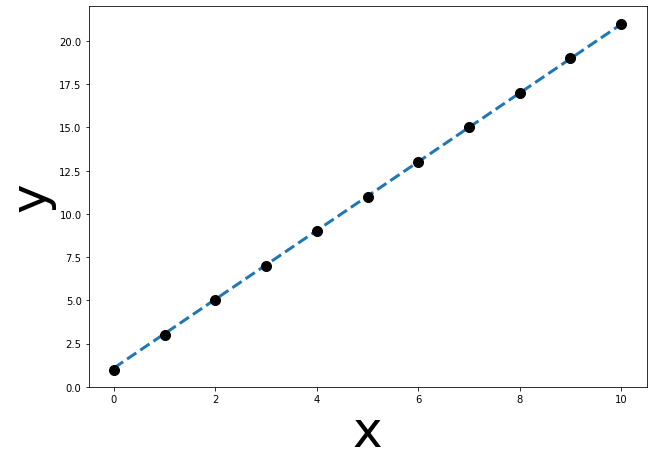

In [13]:
# Plot the predicted-y (blue line) vs expected targets (black dots)

plt.figure(figsize = (10, 7))

plt.plot(predicted, '--', linewidth = 3)
plt.plot(x_train, y_train, 'o', color = 'black', markersize = 10)
plt.xlabel('x', fontsize = 50)
plt.ylabel('y', fontsize = 50)

# <span style='color:red'> Part 3: Python Concepts for PyTorch ---------------------------------------------------------</span>

### 3.1 - Python Classes

In [14]:
class Pokemon():
    def __init__(self, Name, Type, Health): # Define attributes for the Pokemon object
        self.Name = Name
        self.Type = Type 
        self.Health = Health
        
    # Define methods for the Pokemon object
    
    def whats_your_name(self): # Your method can directly use the attributes defined in __init__
        print("My name is " + self.Name + "!")

    def attack(self):
        print("Electric attack! Zap!!")

    def dodge(self):
        print("Pikachu Dodge!")

    def evolve(self):
        print("Evolving to Raichu!!")

In [ ]:
pk1 = Pokemon(Name = "Pikachu", Type = "Electric", Health = 70)

In [ ]:
pk1.Name

In [ ]:
pk1.whats_your_name()

In [ ]:
pk1.attack()

### 3.2 - PyTorch Tensors vs Numpy Arrays

In [5]:
# Defining a numpy array
array1 = np.array([1,2,3,4]) 
print(array1, type(array1))

[1 2 3 4] <class 'numpy.ndarray'>


In [6]:
# Defining a torch tensor
tensor1 = torch.tensor([1,2,3,4])
print(tensor1, type(tensor1))

tensor([1, 2, 3, 4]) <class 'torch.Tensor'>


In [7]:
# Converting numpy array to torch tensor
array1_torch = torch.from_numpy(array1)
print(array1_torch, type(array1_torch))

tensor([1, 2, 3, 4], dtype=torch.int32) <class 'torch.Tensor'>


In [8]:
# Converting torch tensor to numpy array
tensor1_numpy = tensor1.numpy()
print(tensor1_numpy, type(tensor1_numpy))

[1 2 3 4] <class 'numpy.ndarray'>


### 3.3 - Handling Torch Tensors

In [9]:
# Transferring your torch tensor to CPU
tensor1_cpu = tensor1.cpu()
print(tensor1_cpu.device)

cpu


In [10]:
# Transferring your torch tensor to GPU
tensor1_gpu = tensor1.cuda()
print(tensor1_gpu.device)

cuda:0
